In [1]:
import pickle

import numpy as np
from scipy.stats import qmc
from scipy.special import eval_legendre

import rose

from benchmark import BenchmarkData

In [2]:
sampler = qmc.LatinHypercube(2)
n_samples = 50
sample = sampler.random(n_samples)

In [3]:
lower_bounds = [100, -200]
upper_bounds = [300, 0]

parameter_samples = qmc.scale(sample, lower_bounds, upper_bounds)

In [4]:
se = rose.SchroedingerEquation(rose.MN_Potential)

In [5]:
energy = 50 # MeV
n = 10000

benchmark_data = [BenchmarkData(se, energy, theta, n) for theta in parameter_samples]

In [6]:
filename = f'benchmark_data_MN_Potential_E_{energy:.2f}_MeV.pkl'
with open(filename, 'wb') as f:
    pickle.dump(benchmark_data, f, pickle.HIGHEST_PROTOCOL)

In [7]:
with open(filename, 'rb') as f:
    bd = pickle.load(f)

In [8]:
import matplotlib.pyplot as plt

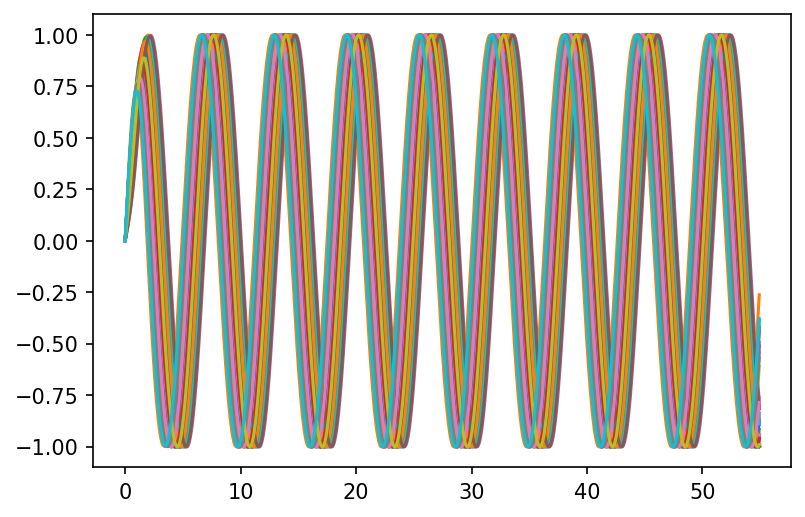

In [9]:
fig, ax = plt.subplots(dpi=150)
fig.patch.set_facecolor('white')

for d in bd:
    ax.plot(d.r, d.u)

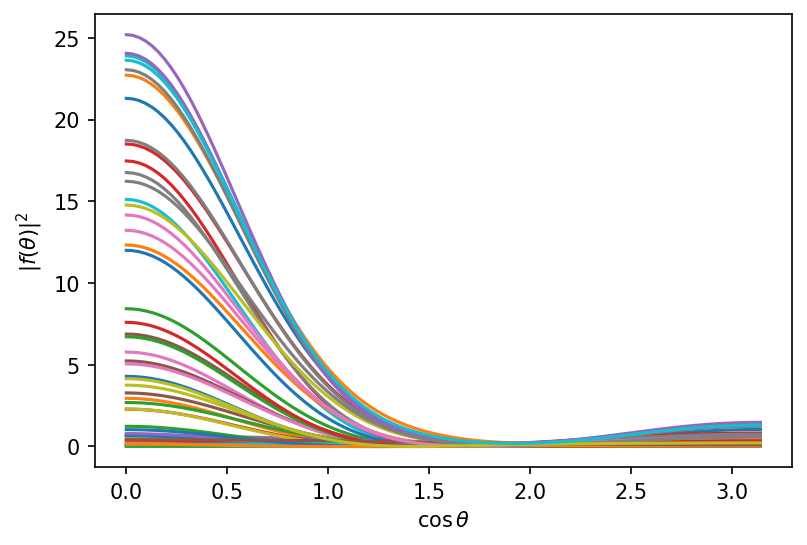

In [11]:
fig, ax = plt.subplots(dpi=150)
fig.patch.set_facecolor('white')

for d in bd:
    f = d.scattering_amplitude
    ax.plot(np.arccos(d.costheta), np.real(f*np.conj(f)))

ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$|f(\theta)|^2$');